# Let's apply some transformations to our dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline

In [2]:
sys.path.insert(0, os.path.abspath('../src'))
import functions as fn

In [3]:
bank_f = pd.read_csv('../Data/raw/bank-full.csv', sep = ';')
bank_f

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
numerical_df, categorical_df = fn.num_cat_splitter(bank_f)

As we saw in *exploratory_data_analysis.ipynb* our dataset had a lot of outliers:

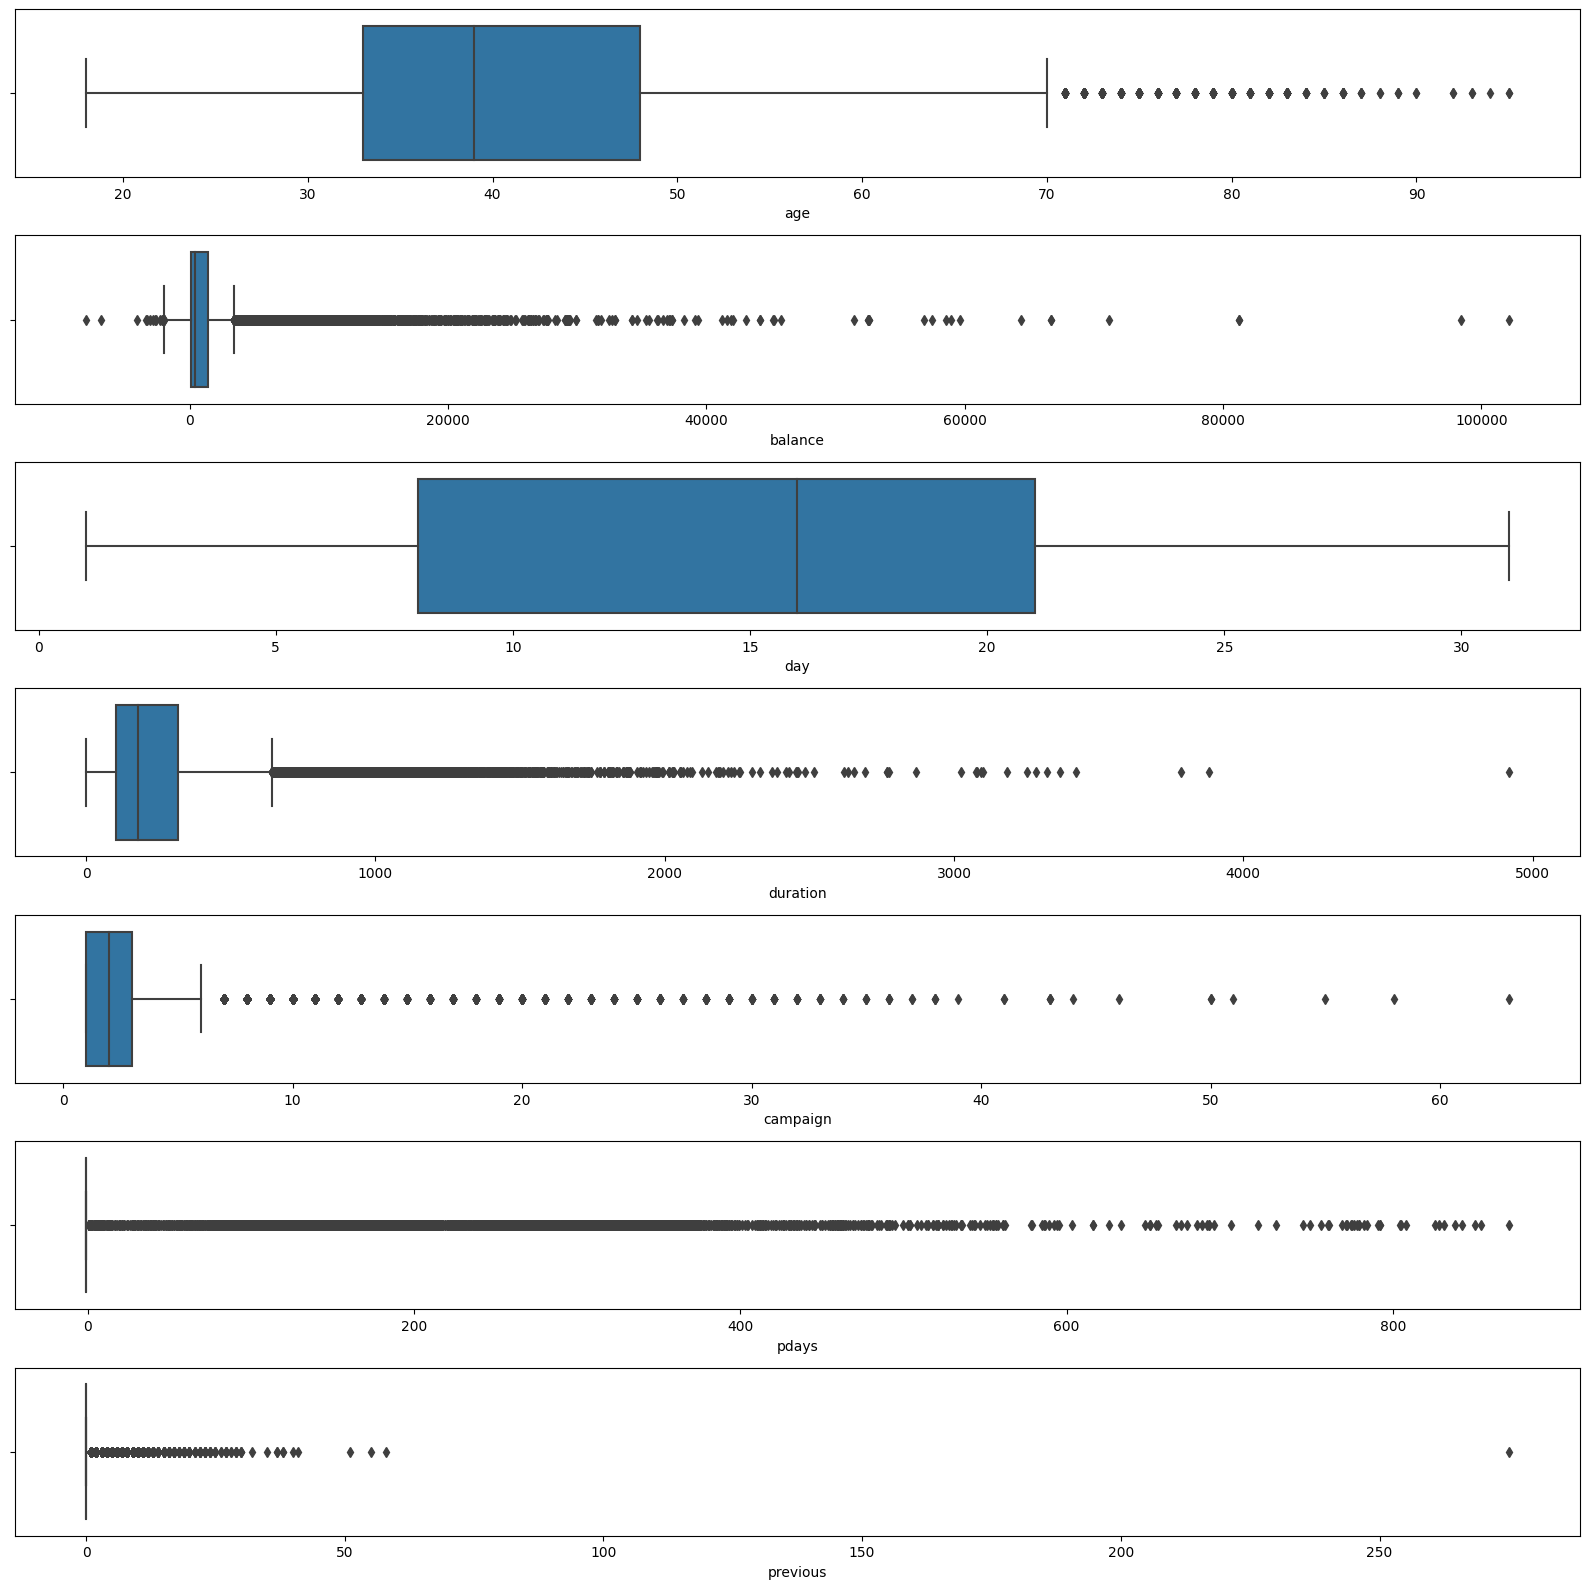

In [5]:
fn.box_generator(numerical_df, save ='No')

Therefore we are going to remove outliers taking into consideration all the values which are between 3 times smaller or bigger the standard deviation of the mean:

In [6]:
#%%writefile -a ../src/functions.py
#def outlier_remover(df):
#    df1 = df.copy()
#    thr=3
#    to_remove = []
#    for col in df1.columns:
#        sd_dw = np.mean(df1[col]) - (thr*(df1[col].std()))
#        sd_up = np.mean(df1[col]) + (thr*(df1[col].std()))
#        out = df1[(df1[col] < sd_dw)|(df1[col] > sd_up)]
#        to_remove += list(out.index)
#    df1 = df1.drop(to_remove)
#    df1 = df1.reset_index(drop=True)
#    return df1

In [7]:
numerical_0out = fn.outlier_remover(numerical_df)

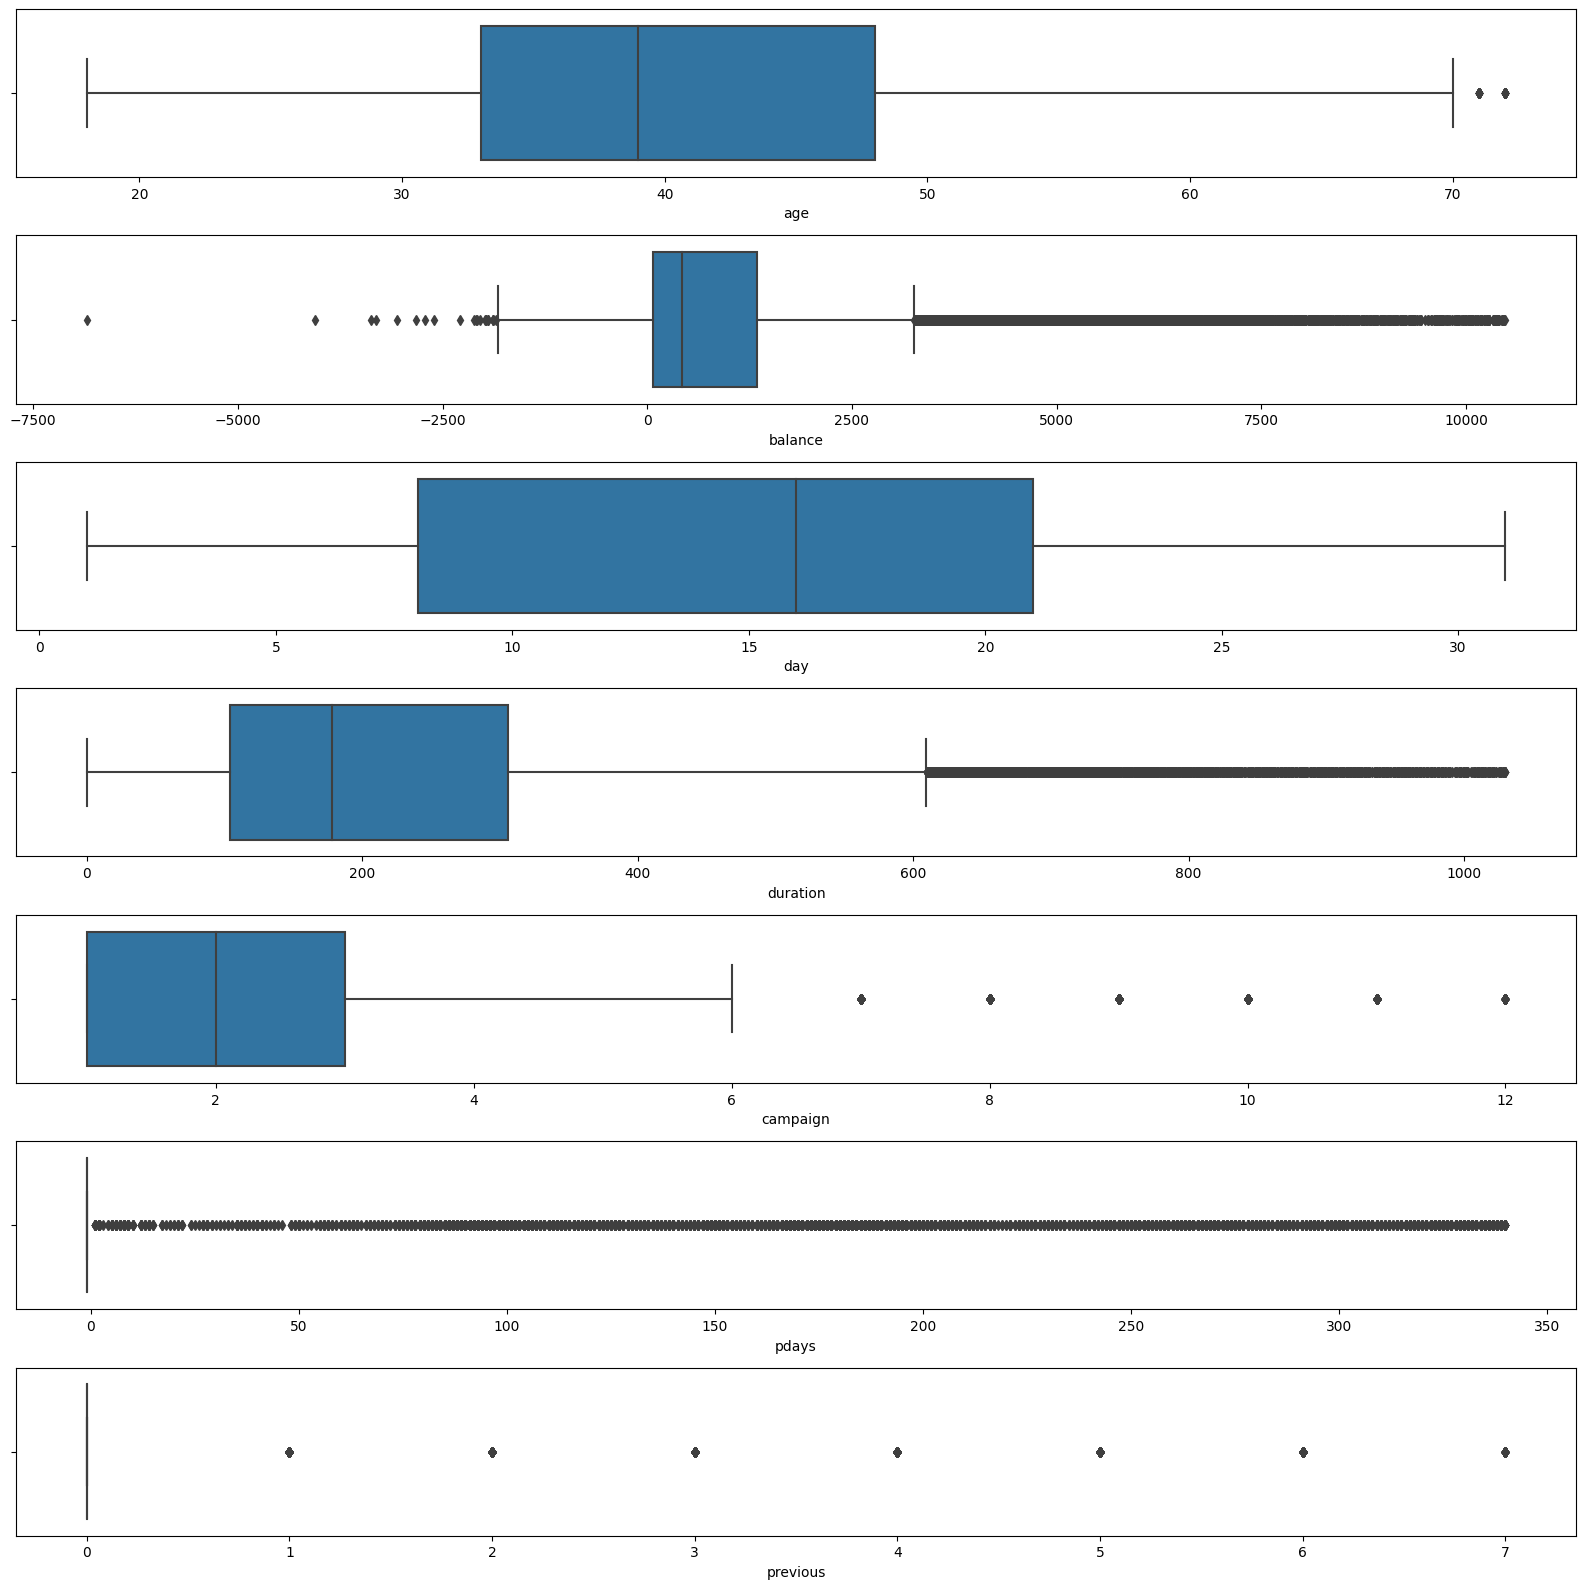

In [8]:
fn.box_generator(numerical_0out, name ='../Slides/without_outliers_plot.png')

Now our data looks much better, however, the numerical columns are heavily skewed:

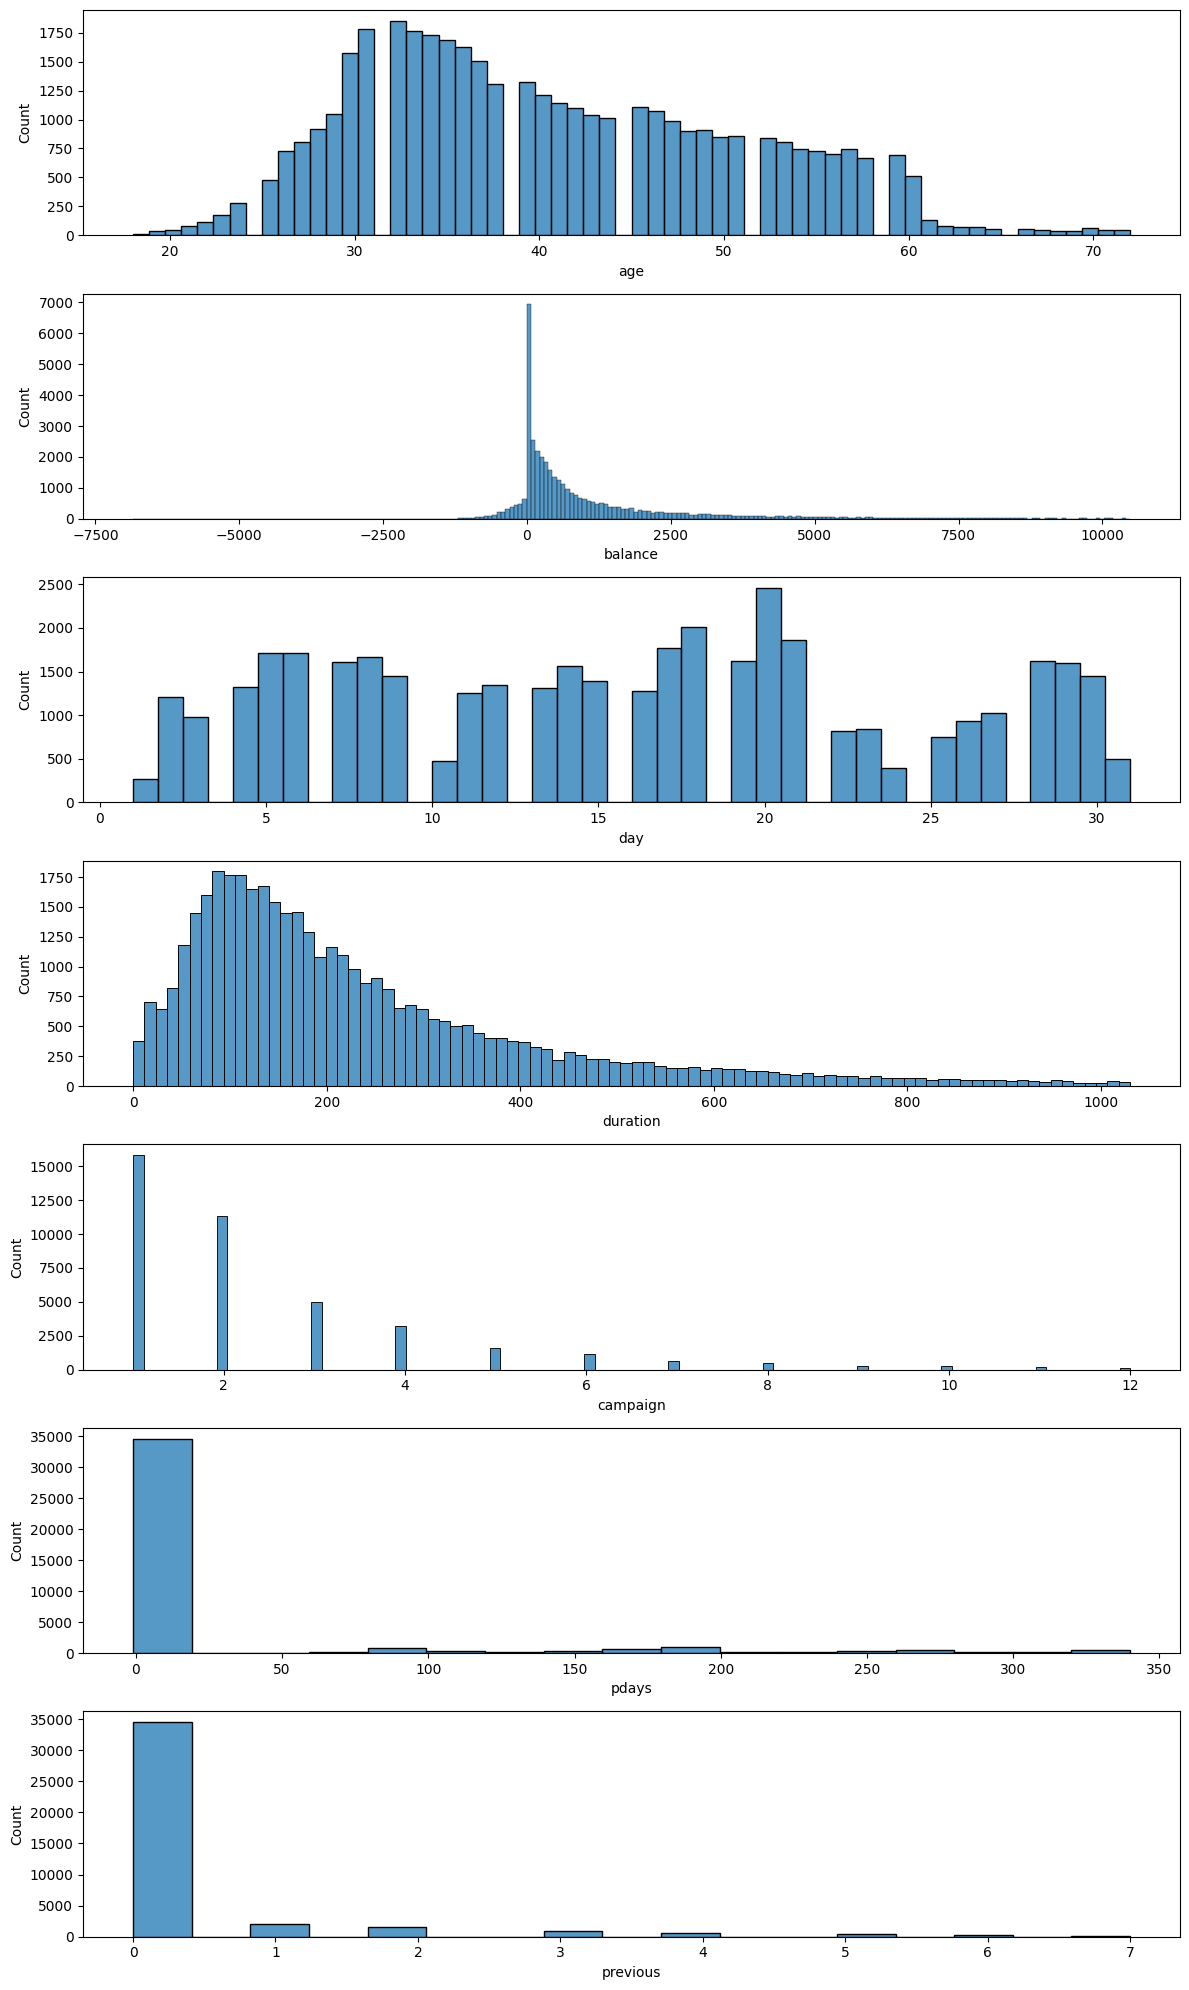

In [9]:
fn.hist_generator(numerical_0out, save='No')

Some are better than before, nevertheless we can apply a PowerTransformer in order to make distributions more Gaussian-like:

In [10]:
categorical_df.shape

(45211, 10)

In [11]:
numerical_0out.shape

(40209, 7)

In [12]:
bank_0out = pd.concat([categorical_df, numerical_0out], axis=1)
bank_0out = bank_0out.dropna().reset_index(drop=True)
bank_0out
#reconcat with numericals and X-Y split

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,33.0,1.0,5.0,198.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40204,self-employed,married,unknown,no,no,no,cellular,jun,unknown,yes,23.0,113.0,17.0,266.0,1.0,-1.0,0.0
40205,technician,married,secondary,no,yes,no,cellular,jun,unknown,yes,25.0,505.0,17.0,386.0,2.0,-1.0,0.0
40206,self-employed,single,tertiary,no,yes,no,cellular,jun,unknown,no,51.0,825.0,17.0,977.0,3.0,-1.0,0.0
40207,blue-collar,married,primary,no,no,no,cellular,jun,unknown,yes,71.0,1729.0,17.0,456.0,2.0,-1.0,0.0


In order to perform our predictions, we should make the X-Y split:

In [13]:
y = bank_0out['y']
X = bank_0out.drop('y', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

And we have to split again numericals and categoricals in order to fit our transformations in the train set

In [14]:
#split again numericals and categoricals
X_train_num, X_train_cat = fn.num_cat_splitter(X_train)
X_test_num, X_test_cat = fn.num_cat_splitter(X_test)

In [15]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer().fit(X_train_num)

X_train_num_trans = transformer.transform(X_train_num)
X_test_num_trans = transformer.transform(X_test_num)

#X_train_transformed = pd.DataFrame(X_train_num_trans, columns=X_train.columns)
#X_test_transformed = pd.DataFrame(X_test_num_trans, columns=X_test.columns)

Now that the distribution should be more Gaussean-like, we have to apply Min Max Scaler in order to be understandable our model once we concatenate the numerical columns transformered with categoricals encoded.

In [16]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num_trans)

X_train_num_scal = transformer.transform(X_train_num_trans)
X_test_num_scal = transformer.transform(X_test_num_trans)

X_train_scaled = pd.DataFrame(X_train_num_scal, columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_num_scal, columns=X_test_num.columns)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

X_train_cat_np = encoder.transform(X_train_cat).toarray()
X_test_cat_np = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out())
X_test_cat_encoded = pd.DataFrame(X_test_cat_np, columns=encoder.get_feature_names_out())

In [18]:
X_train_transformed = pd.concat([X_train_scaled, X_train_cat_encoded], axis=1)
X_train_transformed.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,0.340129,0.830346,0.519826,0.633043,0.402583,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.776636,0.835208,0.420488,0.534902,0.795468,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.673653,0.870101,0.814937,0.500953,0.402583,0.993578,0.999982,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.515840,0.831148,0.673009,0.804089,0.717959,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.496028,0.804115,0.275225,0.692504,0.985658,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Furthermore, as we saw the target column I want to predict is heavily imbalanced, so I have decided to oversample the *y* because if we downsample it a lot of data will be lost and the model wouldn't predict well the people who doesn't subscribe a term deposit.  

In [19]:
X_test_transformed = pd.concat([X_test_scaled, X_test_cat_encoded], axis=1)
X_test_transformed.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,0.854738,0.858141,0.673009,0.725646,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.673653,0.829502,0.673009,0.585744,0.402583,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.233655,0.832285,0.350063,0.602229,0.402583,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.689275,0.840959,0.922358,0.636747,0.402583,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.475670,0.851211,0.194452,0.361038,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=23)
X_train_over, y_train_over = ros.fit_resample(X_train_transformed, y_train)

display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.340129,0.830346,0.519826,0.633043,0.402583,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
1,0.776636,0.835208,0.420488,0.534902,0.795468,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
2,0.673653,0.870101,0.814937,0.500953,0.402583,0.993578,0.999982,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no
3,0.515840,0.831148,0.673009,0.804089,0.717959,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
4,0.496028,0.804115,0.275225,0.692504,0.985658,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no


Resampled dataset shape Counter({'yes': 29811, 'no': 29811})
yes    29811
no     29811
Name: y, dtype: int64


In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=23, solver='lbfgs', max_iter=1000).fit(X_train_over, y_train_over)

y_train_pred = lr.predict(X_train_over)
y_test_pred  = lr.predict(X_test_transformed)

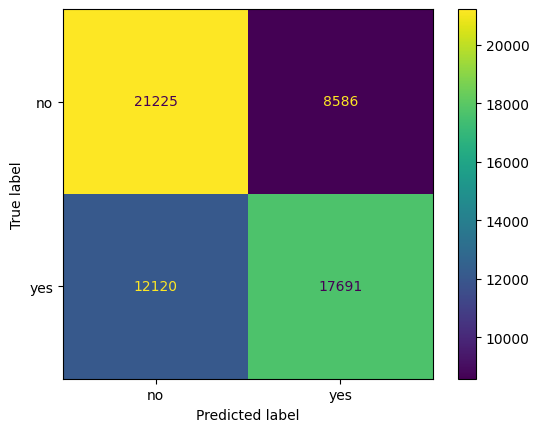

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

cm_train_imb = confusion_matrix(y_train_over, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train_imb, display_labels=lr.classes_)
disp.plot()
#savefig
plt.show()

In [23]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train_over, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred, target_names=['A','B']))
print(cohen_kappa_score(y_train_over, y_train_pred))

The accuracy in the TRAIN set is: 0.653
The accuracy in the TEST  set is: 0.701
              precision    recall  f1-score   support

           A       0.95      0.71      0.81      7415
           B       0.14      0.54      0.22       627

    accuracy                           0.70      8042
   macro avg       0.54      0.63      0.52      8042
weighted avg       0.89      0.70      0.77      8042

0.305424172285398


The model is a bullshit :(, so let's try with SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=23)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [25]:
lr2 = LogisticRegression(max_iter=1000, random_state=23).fit(X_train_SMOTE, y_train_SMOTE)

y_train_pred2 = lr2.predict(X_train_SMOTE)
y_test_pred2 = lr2.predict(X_test_transformed)

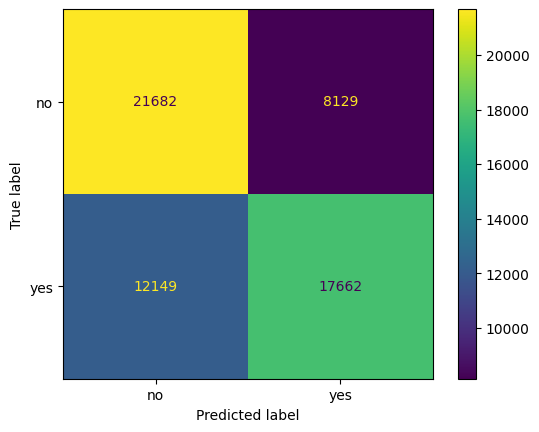

In [26]:
cm_train_imb2 = confusion_matrix(y_train_SMOTE, y_train_pred2)
disp = ConfusionMatrixDisplay(cm_train_imb2, display_labels=lr2.classes_);
disp.plot()
#savefig
plt.show()

In [27]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train_SMOTE, y_train_pred2)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred2)))
print(classification_report(y_test, y_test_pred2, target_names=['A','B']))
print(cohen_kappa_score(y_train_SMOTE, y_train_pred2))

The accuracy in the TRAIN set is: 0.660
The accuracy in the TEST  set is: 0.715
              precision    recall  f1-score   support

           A       0.95      0.73      0.83      7415
           B       0.14      0.54      0.23       627

    accuracy                           0.71      8042
   macro avg       0.55      0.64      0.53      8042
weighted avg       0.89      0.71      0.78      8042

0.31978128878601864


The model seems to be a bit better, but still it's not good at all.